**Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, confusion_matrix, \
    roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

**Load the 'Pokemon.csv' dataset as a pandas dataframe, change the Type 1 and Type 2 variables to categorical and replace 'Type 2' missing values (replace by the value of 'Type 1').**

In [3]:
file = 'Pokemon.csv'

##Read dataframe##

df = pd.read_csv(file)
print(df.head())

   #                   Name Type 1  ... Speed  Generation  Legendary
0  1              Bulbasaur  Grass  ...    45           1      False
1  2                Ivysaur  Grass  ...    60           1      False
2  3               Venusaur  Grass  ...    80           1      False
3  3  VenusaurMega Venusaur  Grass  ...    80           1      False
4  4             Charmander   Fire  ...    65           1      False

[5 rows x 13 columns]


In [4]:
##Change variables types##

print(df.dtypes)
df.astype({'Type 1': 'category', 'Type 2': 'category'})

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
##Check for any missing values, replace them accordingly or remove the associated rows###

print(df.isna().sum())
df['Type 2'].fillna(df['Type 1'], inplace=True)

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [6]:
print(df.isna().sum())

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


**Select the target variable y as 'HP' and the predictor as 'Attack', split the dataset in a train and a test set with a 0.8/0.2 ratio.**

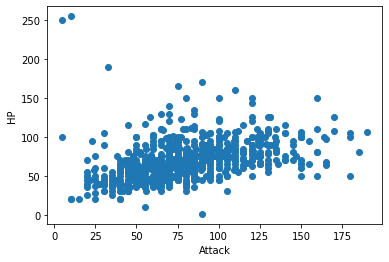

((640, 1), (640,)) ((160, 1), (160,))


In [7]:
##Select a target variable y and a predictor x. Reshape the data x to [num_samples, 1]##

y = df['HP'].values
x = df['Attack'].values
X = x[:, np.newaxis]
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Attack')
ax.set_ylabel('HP')
plt.show()

##Define a training set and a validation set##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

**Build a linear regression model and fit it to the training data.**

In [8]:
##Define the linear regression model, and reshape the data x to [num_samples, 1]##

model = LinearRegression(fit_intercept=True)

##Fit the model to the training data##

model.fit(X_train,y_train)

LinearRegression()

**Get the model's parameters, and compute the coefficient of determination and the mean square error on both the training and test sets.**

In [9]:
##Get the model's parameters##

print('Model\'s coefficients : {}'.format(model.coef_))
print('Model\'s intercept : {}'.format(model.intercept_))

Model's coefficients : [0.33777806]
Model's intercept : 42.333963842258655


In [10]:
##Make predictions for both the training and the test sets##

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

##Compute th coefficient of determination and the mean square error on both sets##

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

print('MSE on training set : {}'.format(MSE_train))
print('R2 on training set : {}'.format(R2_train))
print('MSE on test set : {}'.format(MSE_train))
print('R2 on test set : {}'.format(R2_test))

MSE on training set : 489.51386870959885
R2 on training set : 0.19888079449619922
MSE on test set : 489.51386870959885
R2 on test set : 0.11480822846281125


**Plot the regression line**

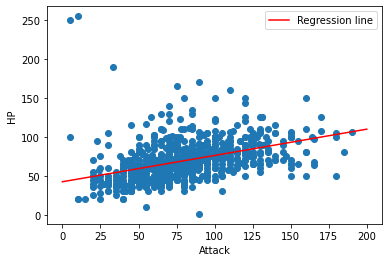

In [11]:
##Generate predictions out of the fitted model##

xfit = np.linspace(0,200)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

##Plot the regression line##

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('Attack')
ax.set_ylabel('HP')
ax.plot(xfit, yfit, label='Regression line', color='red')
ax.legend()
plt.show()

**Your turn !**

**1) Do the same as above, but now include 'Defense' as a second predictor.**

**Let's now experiment with classification. Select the variables 'HP', 'Attack' and 'Defense' as predictors, and 'Legendary' as the target variable.**

**2) Apply the same methodology as above, but this time use the KNeighborsClassifier of the sklearn library to predict whether a Pokemon is legendary or not. Set the number of neighbors to 5.**

**3) Create functions that, given arrays of true class labels and predicted lables, compute :**

*   **a) The accuracy**
*   **b) The recall score**
*   **c) The precision score**
*    **d) The confusion matrix**
*   **e) The F1-score**

**Compare the result of your implementation of these metrics on predictions for the training and test sets to the methods of the sklearn library.**

